# Import Libraries and Project Paths

In [1]:
from utils.setup_path import add_project_root_to_path
add_project_root_to_path()

In [2]:
import yaml
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from CNN_FashionMNIST.utils.dataset import load_fashion_mnist

# Load Configuration

In [4]:
with open('../configs/config.yaml', 'r') as f:
    config = yaml.safe_load(f)
class_names = config['class_names']

# Load DataLoaders

In [5]:
train_loader, val_loader, test_loader = load_fashion_mnist(config['batch_size'])

# Print dataset sizes
print(f"Training samples: {len(train_loader.dataset)}")
print(f"Validation samples: {len(val_loader.dataset)}")
print(f"Test samples: {len(test_loader.dataset)}")

Training samples: 48000
Validation samples: 12000
Test samples: 10000


# Function to visualize a batch of images

In [10]:
def visualize_batch(data_loader, class_names):
    """
    Visualize a batch of images with labels.

    Args:
        data_loader (DataLoader): DataLoader for the dataset.
        class_names (dict) : Mapping of class indices to class names.
    """
    images, labels = next(iter(data_loader))
    images = images[:16] # Display first 16 images
    labels = labels[:16]
    
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        img = img.squeeze().numpy() # Convert tensor to numpy array
        ax.imshow(img, cmap='gray')
        # Use integer keys for dictionary lookup
        ax.set_title(class_names[label.item()])
        ax.axis('off')

    plt.title('Sample Images')
    plt.tight_layout()
    plt.show()

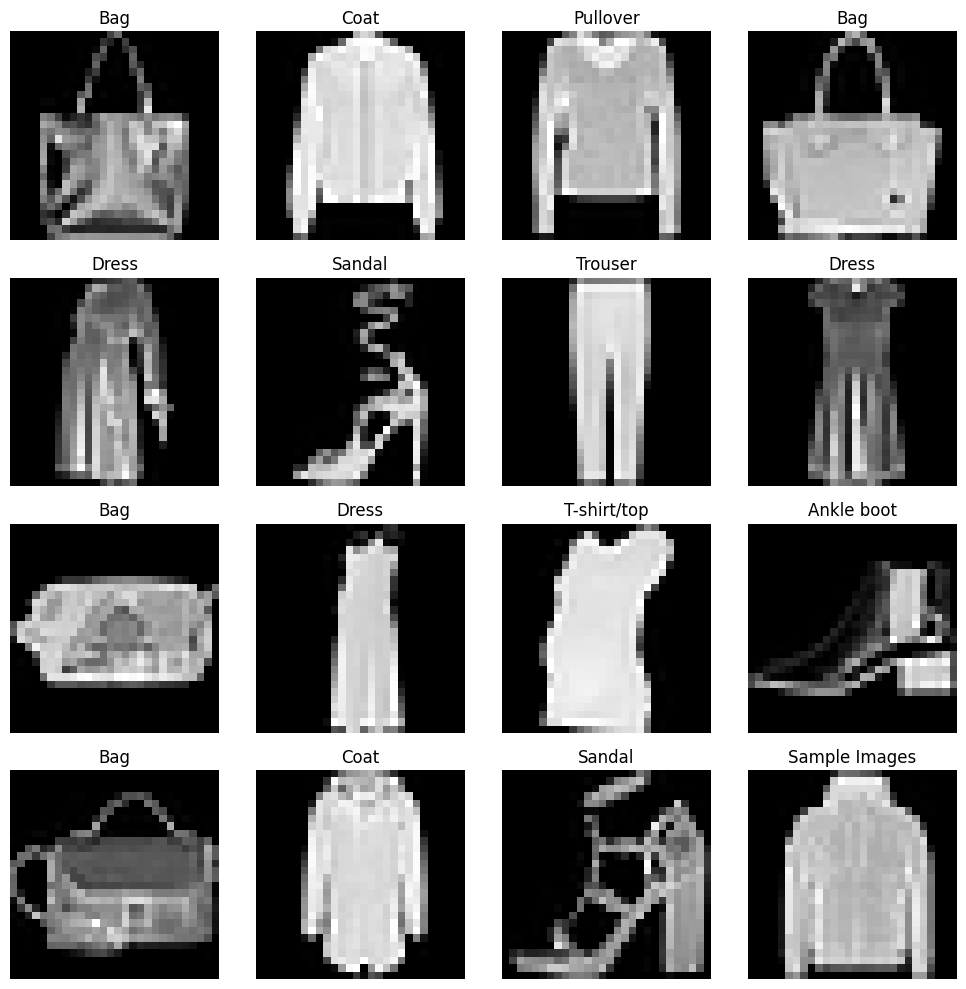

In [11]:
visualize_batch(train_loader, class_names)